<a href="https://colab.research.google.com/github/SefatSikderM/Cricket-Prediction-AI-simple-Model/blob/main/Project_Cricket_Temperature_Co_relation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Tensorflow and Numpy

In [3]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.17.1'

Data plotting as given

In [6]:
chips_15s = np.array([44.000,46.400,43.600,35.000,35.000,32.600,28.900,27.700,25.500,20.375,12.500,37.000,37.500,36.500,36.200,33.000,43.000,46.000,29.000,31.700,31.000,28.750,23.500,32.400,31.000,29.500,22.500,20.600,35.000,33.100,31.500,28.800,21.300,37.800,37.000,37.100,36.200,31.400,30.200,31.300,26.100,25.200,23.660,22.250,17.500,15.500,14.750,15.000,14.000,18.500,27.700,26.000,21.700,12.500,12.500],  dtype=float)
temp_celsius = np.array([26.944, 25.833, 25.556, 23.056, 21.389, 20.000, 18.889, 18.333, 16.389, 13.889, 12.778, 24.583, 23.333, 23.333, 22.500, 18.889, 25.278, 25.833, 20.278, 20.278, 20.000, 18.889, 15.000, 21.111, 20.556, 19.444, 16.250, 14.722, 22.222, 21.667, 20.556, 19.167, 15.556, 23.889, 22.917, 22.500, 21.111, 19.722, 18.889, 20.556, 17.222, 17.222, 16.111, 16.667, 13.611, 12.778, 11.111, 11.667, 10.000, 11.111, 18.333, 17.222, 15.000, 10.417, 9.5833],  dtype=float)

for i,c in enumerate(chips_15s):
  print("{} Chips in 15 Seconds = {} degree Celsius(c)".format(c, temp_celsius[i]))

44.0 Chips in 15 Seconds = 26.944 degree Celsius(c)
46.4 Chips in 15 Seconds = 25.833 degree Celsius(c)
43.6 Chips in 15 Seconds = 25.556 degree Celsius(c)
35.0 Chips in 15 Seconds = 23.056 degree Celsius(c)
35.0 Chips in 15 Seconds = 21.389 degree Celsius(c)
32.6 Chips in 15 Seconds = 20.0 degree Celsius(c)
28.9 Chips in 15 Seconds = 18.889 degree Celsius(c)
27.7 Chips in 15 Seconds = 18.333 degree Celsius(c)
25.5 Chips in 15 Seconds = 16.389 degree Celsius(c)
20.375 Chips in 15 Seconds = 13.889 degree Celsius(c)
12.5 Chips in 15 Seconds = 12.778 degree Celsius(c)
37.0 Chips in 15 Seconds = 24.583 degree Celsius(c)
37.5 Chips in 15 Seconds = 23.333 degree Celsius(c)
36.5 Chips in 15 Seconds = 23.333 degree Celsius(c)
36.2 Chips in 15 Seconds = 22.5 degree Celsius(c)
33.0 Chips in 15 Seconds = 18.889 degree Celsius(c)
43.0 Chips in 15 Seconds = 25.278 degree Celsius(c)
46.0 Chips in 15 Seconds = 25.833 degree Celsius(c)
29.0 Chips in 15 Seconds = 20.278 degree Celsius(c)
31.7 Chips in 

Data Viusalization


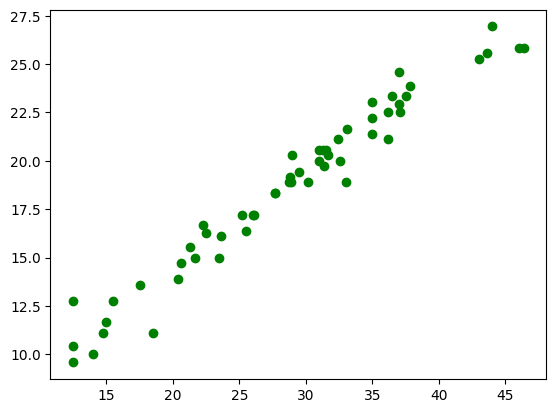

In [8]:
import matplotlib.pyplot as plt
X = chips_15s
Y = temp_celsius
plt.scatter(X,Y ,color = 'green')
plt.show()

In [10]:
from statistics import mean

def best_fit_slope_and_intercept(X,y):
    m = (((mean(X)*mean(y)) - mean(X*y)) /
         ((mean(X)*mean(X)) - mean(X*X)))

    b = mean(y) - m*mean(X)

    return m, b

m, b = best_fit_slope_and_intercept(X,Y)

print(m,b)

0.49543811977958857 4.458638516454446


Best fit Line


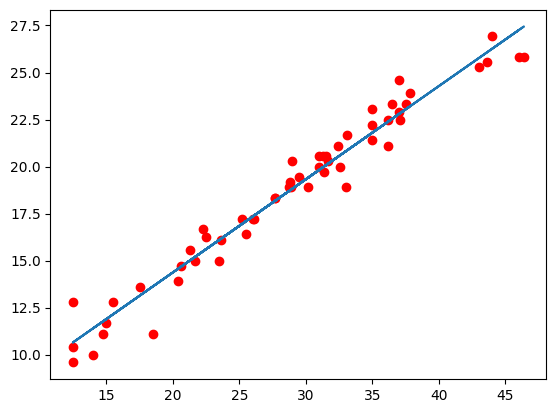

In [12]:
# regression_line = [(m*x)+b for x in X]

regression_line = []
for x in X:
    regression_line.append((m*x)+b)

plt.scatter(X,Y,color='red')
plt.plot(X, regression_line)
plt.show()

In [13]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model = tf.keras.Sequential([l0])

In [15]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [17]:
# X = chips_15s
# y = temp_celsius

# history = model.fit(chips_15s, temp_celsius, epochs=500, verbose=True)
history = model.fit(X, Y, epochs=500, verbose=True)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 858.0045 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 550.9788 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 296.6938 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 128.8252 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38.1921 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8610 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.8695
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.9364 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 57.5957 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 68.8398 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.6728 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.9248 
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 33.6213 
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.1848 
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8895 
Ep

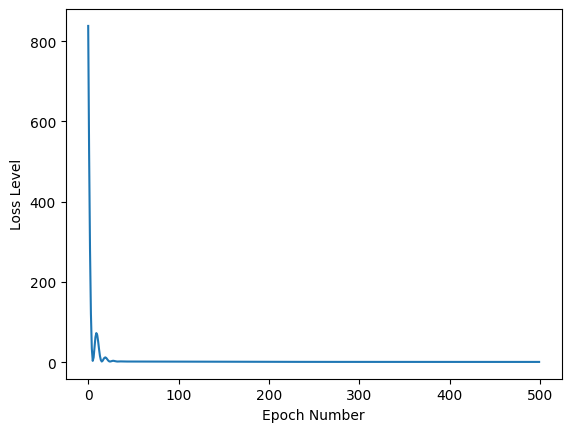

In [18]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Level")
plt.plot(history.history['loss'])

In [21]:
l0.get_weights()

[array([[0.49884647]], dtype=float32), array([4.3336563], dtype=float32)]

In [26]:
print(model.predict(np.array([34])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[21.294436]]
